(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Clustering

## Gaussian mixture

In [ ]:
# Generate data
N = 3
x0 = np.array([])
for i in range(N):
    x = np.random.normal(size=10) + 5*i
    x0 = np.hstack([x0, x])
x0 = x0.reshape((len(x0), 1))

In [5]:
from sklearn import mixture, datasets

In [13]:
data = datasets.load_iris()
X = data.data
Y = data.target

gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')

In [14]:
gmm.fit(X, Y)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
gmm.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
metrics.cluster.

In [25]:
# use iris data set, see performance for different measures
data = datasets.load_iris()
X = data.data
Y = data.target

gmm = mixture.GaussianMixture()

result = []
for n in range(2, 20):
    gmm.set_params(n_components=n)
    gmm.fit(X)
    Yp = gmm.predict(X)
    result.append([
            metrics.cluster.adjusted_rand_score(Y, Yp), 
            metrics.cluster.adjusted_mutual_info_score(Y, Yp),
            metrics.cluster.homogeneity_score(Y, Yp), 
            metrics.cluster.completeness_score(Y, Yp),
            metrics.cluster.v_measure_score(Y, Yp), 
            metrics.cluster.silhouette_score(X, Yp)
            ])
result = np.array(result)

In [26]:
result.shape

(18, 6)

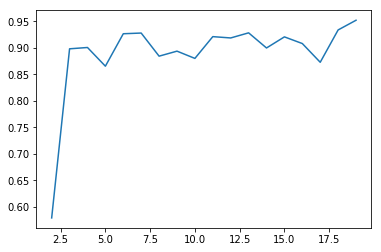

In [28]:
%matplotlib inline
plt.plot(range(2, 20), result[:,2])

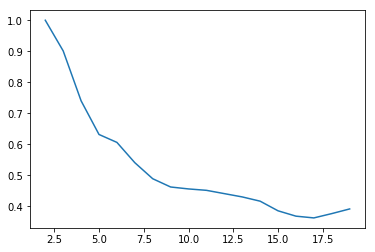

In [29]:
plt.plot(range(2, 20), result[:,3])

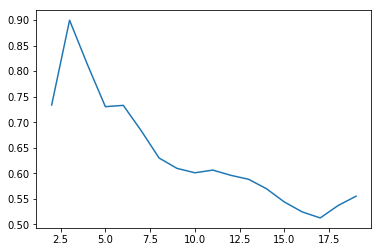

In [30]:
plt.plot(range(2, 20), result[:,4])

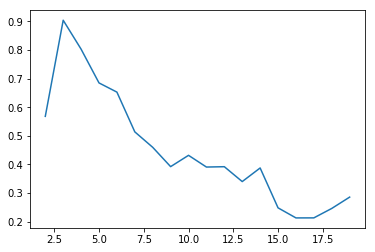

In [31]:
plt.plot(range(2, 20), result[:,0])

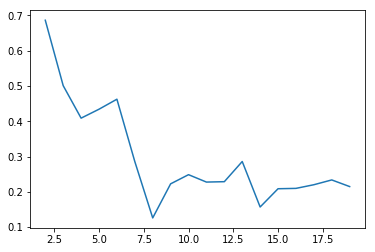

In [32]:
plt.plot(range(2, 20), result[:,5])

In [35]:
from sklearn import decomposition

In [36]:
d_pca = decomposition.PCA(n_components=2)
Xnew = d_pca.fit_transform(X)

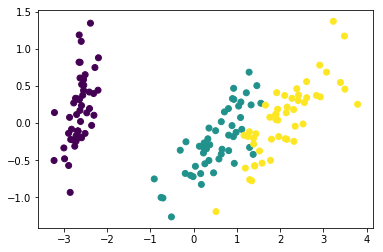

In [38]:
plt.scatter(Xnew[:,0], Xnew[:,1], c=Y)

In [ ]:
# 1. run code, plot result
# 2. understand why?
# 3. choose which one woudl be the preferred one to use (or your preferred way to use)

In [ ]:
# explore the difference between scores

In [ ]:
# Excercise: try following data sets, see how the different scores perform
data = datasets.make_blobs(n_samples=200, centers=5, random_state=0, cluster_std=0.4)
X = data[0]
Y = data[1]

## K-mean

In [ ]:
# this is like the dice-problem in investiment banking interview ...
# http://www.naftaliharris.com/blog/visualizing-k-means-clustering/ 

In [ ]:
# Given N points, and m clusters 
# random assign m cluster center to any points within in the N
# calculate the nearby points N => m 
# N: (1, 2, 3, 1, 2, 4 ,3 ,1 ,3 )
# update m cooridnation: 1 cluster => update coordinate
# N: (1 ,1 ,2, 1, 3, 4, 2, 3, 4,)
# update m coordinate: 
# ...... (100 iteration)
# m cluster center 

In [ ]:
# use iris data set, see performance for different measures

In [39]:
from sklearn import cluster

In [41]:
c_kmean = cluster.KMeans(n_clusters=3)

In [43]:
c_kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
c_kmean.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# Excercise: Check the K-mean's different random state & max_iteration number
# change different centers # and KMean cluster # 

# change k-mean++ into other simple initialization method 

## Hierachical clustering

In [ ]:
# Hierarchical clustering is a general family of clustering algorithms 
# that build nested clusters by merging or splitting them successively.

In [ ]:
# AgglomerativeClustering

In [46]:
c_ac = cluster.AgglomerativeClustering(n_clusters=3)

In [47]:
c_ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x104255488>)

In [48]:
c_ac.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## DBSCAN

In [ ]:
# DBSCAN
# The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.
# http://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Yp, cmap='Spectral')

In [57]:
c_db = cluster.DBSCAN(eps=0.3, min_samples=5)

In [ ]:
c_db = cluster.DBSCAN

In [51]:
c_db.fit_predict(X)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

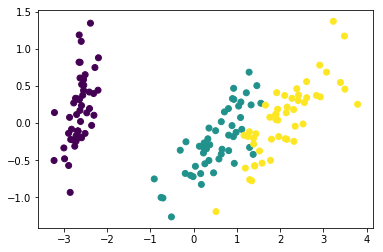

In [52]:
plt.scatter(Xnew[:,0], Xnew[:,1], c=Y)

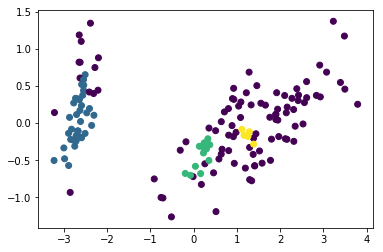

In [58]:
plt.scatter(Xnew[:,0], Xnew[:,1], c=c_db.fit_predict(X))

In [ ]:
# K-mean, Gaussian Mixture, DBSCAN, AggregrateClustering

In [ ]:
# Speed test

In [67]:
Nc = 5
data = datasets.make_blobs(n_samples=100000, n_features=100, centers=Nc, random_state=0)
X = data[0]
Y = data[1]

In [60]:
%%time
model = cluster.KMeans(n_clusters=Nc)
model.fit(X)
result = model.predict(X)

CPU times: user 813 ms, sys: 55 ms, total: 868 ms
Wall time: 230 ms


In [61]:
%%time
model = cluster.AgglomerativeClustering(n_clusters=Nc)
model.fit(X)
result = model.labels_

CPU times: user 8.28 s, sys: 448 ms, total: 8.73 s
Wall time: 8.53 s


In [68]:
%%time
model = cluster.DBSCAN(n_jobs=1)
model.fit(X)
result = model.labels_

CPU times: user 29.9 s, sys: 277 ms, total: 30.2 s
Wall time: 30.3 s


In [69]:
%%time
model = cluster.DBSCAN(n_jobs=4)
model.fit(X)
result = model.labels_

CPU times: user 29.8 s, sys: 224 ms, total: 30 s
Wall time: 30 s


In [63]:
%%time
model = mixture.GMM()
model.fit(X)
result = model.predict(X)

CPU times: user 451 ms, sys: 34.5 ms, total: 485 ms
Wall time: 138 ms


/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

# Outlier detection

In [ ]:
## one-class SVM (novelty detection)
## EclipseEnvelop (outlier detection)

In [71]:
X = np.random.normal(size=100)
X = X[abs(X)<3]
X1 = np.random.normal(loc=3.0, size=10)
X2 = np.concatenate([X,X1])

print (X.shape, X1.shape, X2.shape)

(100,) (10,) (110,)


## One class SVM

In [ ]:
model = svm.OneClassSVM(nu=0.1, gamma=0.1)

In [ ]:
plt.scatter(range(len(X2)), X2, c=model.predict(X2.reshape(-1,1)), cmap='summer')

## EclipseEnvelop

In [72]:
# define a dataset with in & out datasets
n_in = 100
n_out = 20
offset = np.array([1, 1]) * 0.1 
X1 = np.random.randn(n_in, 2) + offset
X2 = np.random.randn(n_in, 2) - offset

Xout = np.random.uniform(low=-6, high=6, size=(n_out, 2))

In [74]:
X = np.vstack([X1, X2, Xout])

In [76]:
from sklearn import covariance

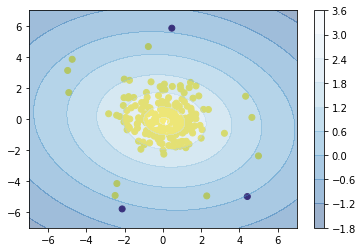

In [79]:
cee = covariance.EllipticEnvelope(contamination=0.01, random_state=1)
cee.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

plt.scatter(X[:,0], X[:,1], c=cee.predict(X))

Z = cee.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()

In [81]:
from sklearn import svm

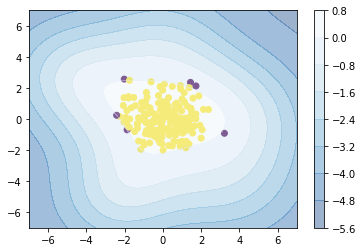

In [82]:
cee = svm.OneClassSVM(kernel='rbf', nu=0.1, gamma=0.1)
cee.fit(X)
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))

plt.scatter(np.vstack([X1, X2])[:,0], np.vstack([X1, X2])[:,1], c=cee.predict(np.vstack([X1, X2])))

Z = cee.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.4)
plt.colorbar()